<a href="https://colab.research.google.com/github/chloeshi0000/data/blob/main/%E6%83%85%E6%84%9F%E5%88%86%E6%9E%902.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# Mount Google Drive
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir("/content/drive/MyDrive/Colab Notebooks/DAIB")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [60]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
st = nltk.PorterStemmer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
import json
import pandas as pd
df = pd.read_json('waitrose.json')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data process

In [63]:
# Combine text
def convert_to_dict(s):
    if s is not None and isinstance(s, str):
        try:
            return json.loads(s)
        except json.JSONDecodeError:
            return None
    else:
        return None


df['extended_tweet_dict'] = df['extended_tweet'].apply(convert_to_dict)
df['full_text'] = [x['full_text'] if x!=None else None for x in df['extended_tweet_dict']]
df['full_text'] = [y if x==None else x for x,y in zip(df['full_text'],df['text'])]
df['text']=df['full_text']
df['text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        RT @HelpThemHelpUs_: Our friends at @Potsandco...
1        @HOOODINIIII @roh17h @Samuel51 @sainsburys @Ma...
2        @waitrose the wine you delivered yesterday was...
3        RT @jlandpartners: This Christmas we want to #...
4        RT @RebeccaTillett1: @waitrose if the U.K. ach...
                               ...                        
24797    @YummyTim @Wine_and_Rugby @UKHospKate @waitros...
24798    RT @SAMPAuk_: @JoJomorris1 @waitrose @Tesco @M...
24799    @TeaTrayThomas @NHSuk @sainsburys @Tesco @asda...
24800    I signed the open letter asking @Tesco @asda @...
24801    Complex, fruity with a smoky finish says @wait...
Name: text, Length: 24802, dtype: object

In [64]:
# Data clean
def to_lower(data):
    return data.lower()


df['text'] = df['text'].apply(lambda x: to_lower(x))

def remove_URLs(data):
    return re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\'(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', data)

df['text'] = df['text'].apply(lambda x: remove_URLs(x))

# Remove punctuations
def remove_punctuations(data):
     return re.sub(r"[~.,%/:;?_&+*=!-@{}\[\]\$#@^]"," ", data)
df['text']= df['text'].apply(lambda x: remove_punctuations(x))
#
def remove_email(data):
    return re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', data)
df['text'] = df['text'].apply(lambda x: remove_email(x))

# Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: remove_numbers(x))

df['text'] = df['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
# Stem and Lemma
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(tokenizer.tokenize)


st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['text']= df['text'].apply(lambda x: stemming_on_text(x))

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return ' ' .join(text)
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))
df['text'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    helpthemhelpus friend potsandco pudding donati...
1    hooodiniiii samuel sainsburys malcolm waitrose...
2    waitrose wine delivered yesterday made violent...
3    jlandpartners this christmas want givealittlel...
4    rebeccatillett waitrose achieves trade deal wi...
Name: text, dtype: object

In [66]:
# Stopword
stop_words = set(stopwords.words('english'))
new_stopwords = ["all", "url", 'id', 'name', 'http', "screen", "we", "us", "ok", "rt", "h", "w", "resize","others","isol",
                 "indices", "str", "text", "type", "picture", "none", "user", "display", "fit", "can",
                 "pic", "media", "twitter", "urls", "url", "mentions", "hashtags", "symbols", "fit", "range", "full",
                 "can", "get", "amp", "ve", "re", "due", "to", "on", "i", "one", "could", "it", "daily", "the", "for", "you", "your", "not", "they", "about", "and", "have", "my", "with", "was", "is", "are", "of", "at"]
stop_words.update(new_stopwords)

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
# Applying the function to the 'text'
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
df= df[df['text'].str.contains('delivery', case=False)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
texts = df['text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# TD/IDF

In [69]:
pip install text_preprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bag of Words Analysis on the dataset:


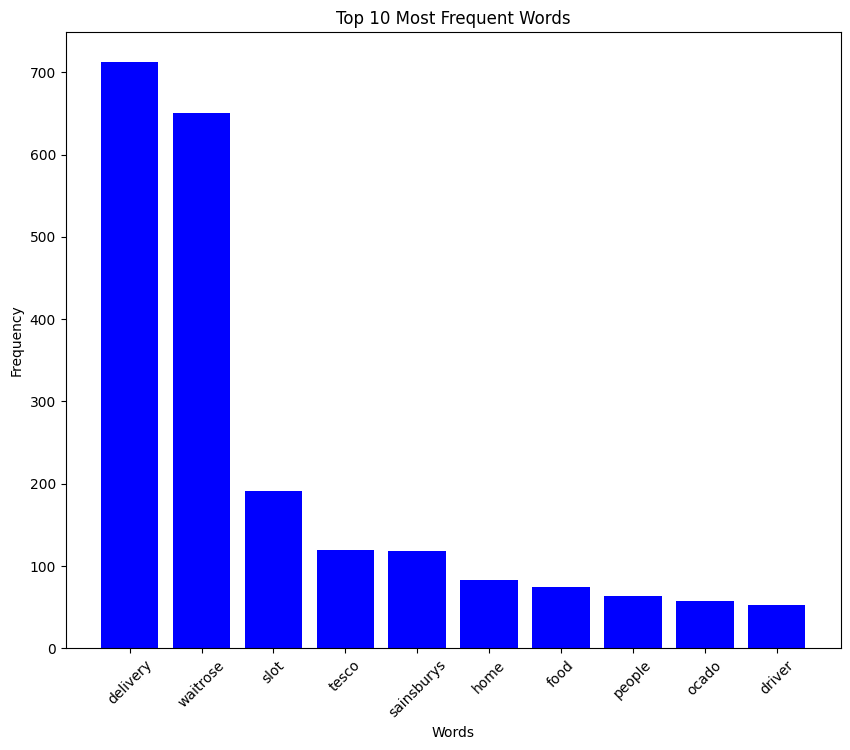

In [70]:
#Bag of Words
import matplotlib.pyplot as plt
from collections import Counter

def bag_of_words_analysis(texts):
    word_counts = Counter()
    for text in texts:
        word_counts.update(text.split())

    most_common = word_counts.most_common(10)
    words, counts = zip(*most_common)

    plt.figure(figsize=(10, 8))
    plt.bar(words, counts, color='blue')
    plt.title("Top 10 Most Frequent Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

    return most_common


print("Bag of Words Analysis on the dataset:")
bow_results = bag_of_words_analysis(df['text'])



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



TF-IDF Analysis on the same sample of the dataset:


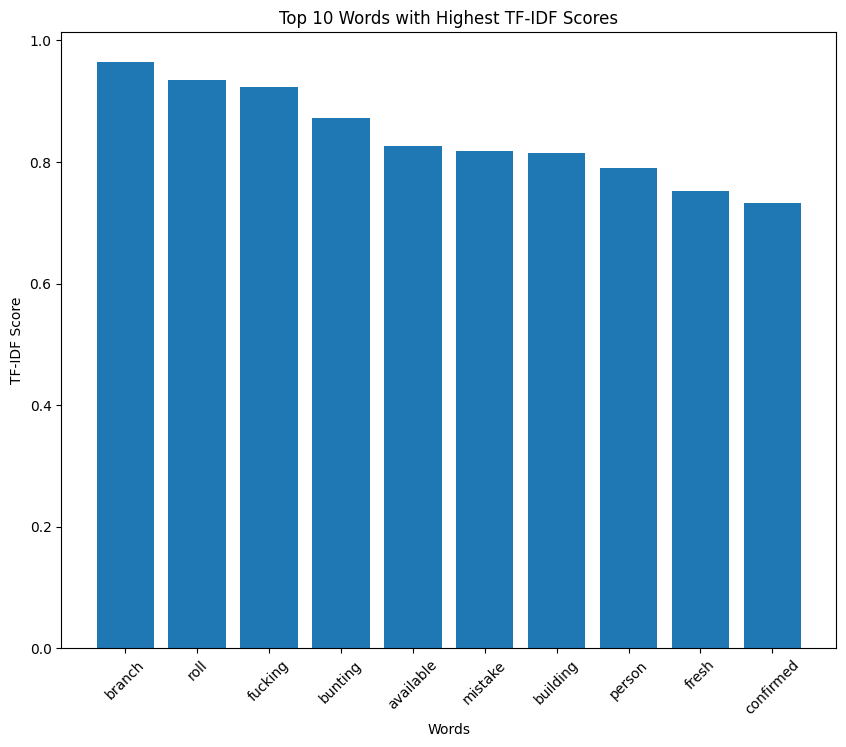

In [71]:
# TF-IDF Analysis
def tf_idf_analysis(texts, top_n=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_array = np.array(vectorizer.get_feature_names_out())

    max_tfidf_dict = {}
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix.getrow(i)
        for word, score in zip(row.indices, row.data):
            feature_word = feature_array[word]
            max_tfidf_dict[feature_word] = max(max_tfidf_dict.get(feature_word, 0), score)

    sorted_words = sorted(max_tfidf_dict.items(), key=lambda item: item[1], reverse=True)[:top_n]
    words, scores = zip(*sorted_words)

    plt.figure(figsize=(10, 8))
    plt.bar(words, scores)
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Score')
    plt.title(f'Top {top_n} Words with Highest TF-IDF Scores')
    plt.xticks(rotation=45)
    plt.show()

    return sorted_words

sample_size = 581

df_sample = df.sample(n=sample_size, random_state=1)
print("\nTF-IDF Analysis on the same sample of the dataset:")
tfidf_results = tf_idf_analysis(df_sample['text'])

# LDA

In [72]:
pip install gensim


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
pip install pyldavis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
from gensim import corpora, models
from gensim.utils import simple_preprocess

documents = df['text'].dropna()


def tokenize(text):
    return simple_preprocess(text, deacc=True)  # deacc=True 去除标点

texts = documents.apply(tokenize)
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15, random_state=100)
num_topics = 10
num_words = 10

topics = lda_model.print_topics(num_topics=num_topics, num_words=num_words)
for topic in topics:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.244*"sainsburys" + 0.239*"tesco" + 0.161*"asda" + 0.105*"morrison" + 0.046*"food" + 0.039*"ocado" + 0.034*"slot" + 0.024*"priority" + 0.024*"elderly" + 0.020*"vulnerable"')
(1, '0.221*"driver" + 0.160*"thank" + 0.151*"today" + 0.109*"store" + 0.069*"well" + 0.064*"morning" + 0.055*"week" + 0.044*"grocery" + 0.044*"last" + 0.024*"jlandpartners"')
(2, '0.159*"year" + 0.131*"next" + 0.116*"van" + 0.115*"jlandpartners" + 0.098*"vehicle" + 0.095*"sustainable" + 0.095*"electric" + 0.061*"help" + 0.055*"alongside" + 0.055*"starting"')
(3, '0.241*"online" + 0.211*"ocado" + 0.153*"thanks" + 0.119*"shopping" + 0.102*"many" + 0.062*"week" + 0.033*"driver" + 0.011*"customer" + 0.009*"supermarket" + 0.009*"year"')
(4, '0.150*"service" + 0.148*"order" + 0.121*"please" + 0.110*"slot" + 0.095*"shop" + 0.084*"still" + 0.083*"online" + 0.031*"week" + 0.029*"trying" + 0.027*"time"')
(5, '0.276*"slot" + 0.122*"vulnerable" + 0.094*"priority" + 0.073*"parent" + 0.062*"trying" + 0.052*"book" + 0.047*"

In [75]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


# sentiment

In [76]:
!pip install transformers torch

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
# Use pretrained model
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from scipy.special import softmax

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
encoded_inputs = tokenizer("your input text", truncation=True, max_length=128)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
# Load
model_name = 'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

def sentiment_score(review_text):

    encoded_review = tokenizer.encode_plus(
        review_text,
        max_length=512,
        add_special_tokens=True,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids = encoded_review['input_ids'].to('cpu')
    attention_mask = encoded_review['attention_mask'].to('cpu')

    with torch.no_grad():
        output = model(input_ids, attention_mask)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)

    return scores
sampled_df = df.sample(n=500, random_state=42)
sampled_df['sentiment_scores'] = sampled_df['text'].apply(sentiment_score)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the bat

In [80]:
sampled_df['sentiment_scores']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10364    [0.009775998, 0.58306056, 0.40716347]
18191     [0.0051653837, 0.53640854, 0.458426]
9403      [0.26626593, 0.7055161, 0.028218016]
11844     [0.26626593, 0.7055161, 0.028218016]
11315    [0.9679547, 0.029647442, 0.002397921]
                         ...                  
4995     [0.20519654, 0.73334044, 0.061463006]
8804      [0.16144629, 0.75051016, 0.08804356]
13712     [0.2900357, 0.68819535, 0.021768961]
16477     [0.007332625, 0.47192726, 0.5207401]
7142      [0.10425897, 0.81950253, 0.07623845]
Name: sentiment_scores, Length: 500, dtype: object

In [81]:
max_indexes = [np.argmax(scores) for scores in sampled_df['sentiment_scores']]

sentiment_classes = ['Negative', ' Neutral', 'Positive']

predicted_sentiments = [sentiment_classes[idx] for idx in max_indexes]

sampled_df['predicted_sentiment'] = predicted_sentiments

print(sampled_df[['sentiment_scores', 'predicted_sentiment']])

                            sentiment_scores predicted_sentiment
10364  [0.009775998, 0.58306056, 0.40716347]             Neutral
18191   [0.0051653837, 0.53640854, 0.458426]             Neutral
9403    [0.26626593, 0.7055161, 0.028218016]             Neutral
11844   [0.26626593, 0.7055161, 0.028218016]             Neutral
11315  [0.9679547, 0.029647442, 0.002397921]            Negative
...                                      ...                 ...
4995   [0.20519654, 0.73334044, 0.061463006]             Neutral
8804    [0.16144629, 0.75051016, 0.08804356]             Neutral
13712   [0.2900357, 0.68819535, 0.021768961]             Neutral
16477   [0.007332625, 0.47192726, 0.5207401]            Positive
7142    [0.10425897, 0.81950253, 0.07623845]             Neutral

[500 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


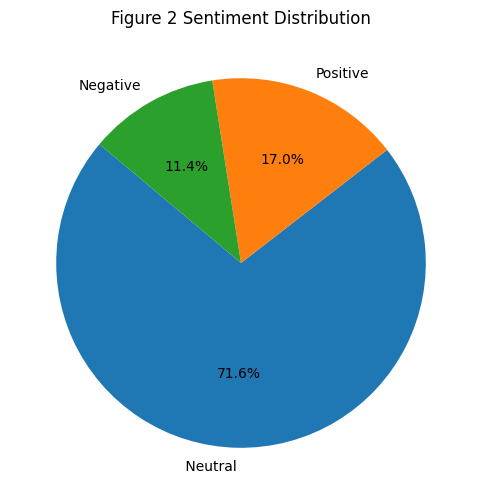

In [82]:
import matplotlib.pyplot as plt

sentiment_counts = sampled_df['predicted_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Figure 2 Sentiment Distribution')
plt.show()



In [83]:
pip install wordcloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
from wordcloud import WordCloud


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


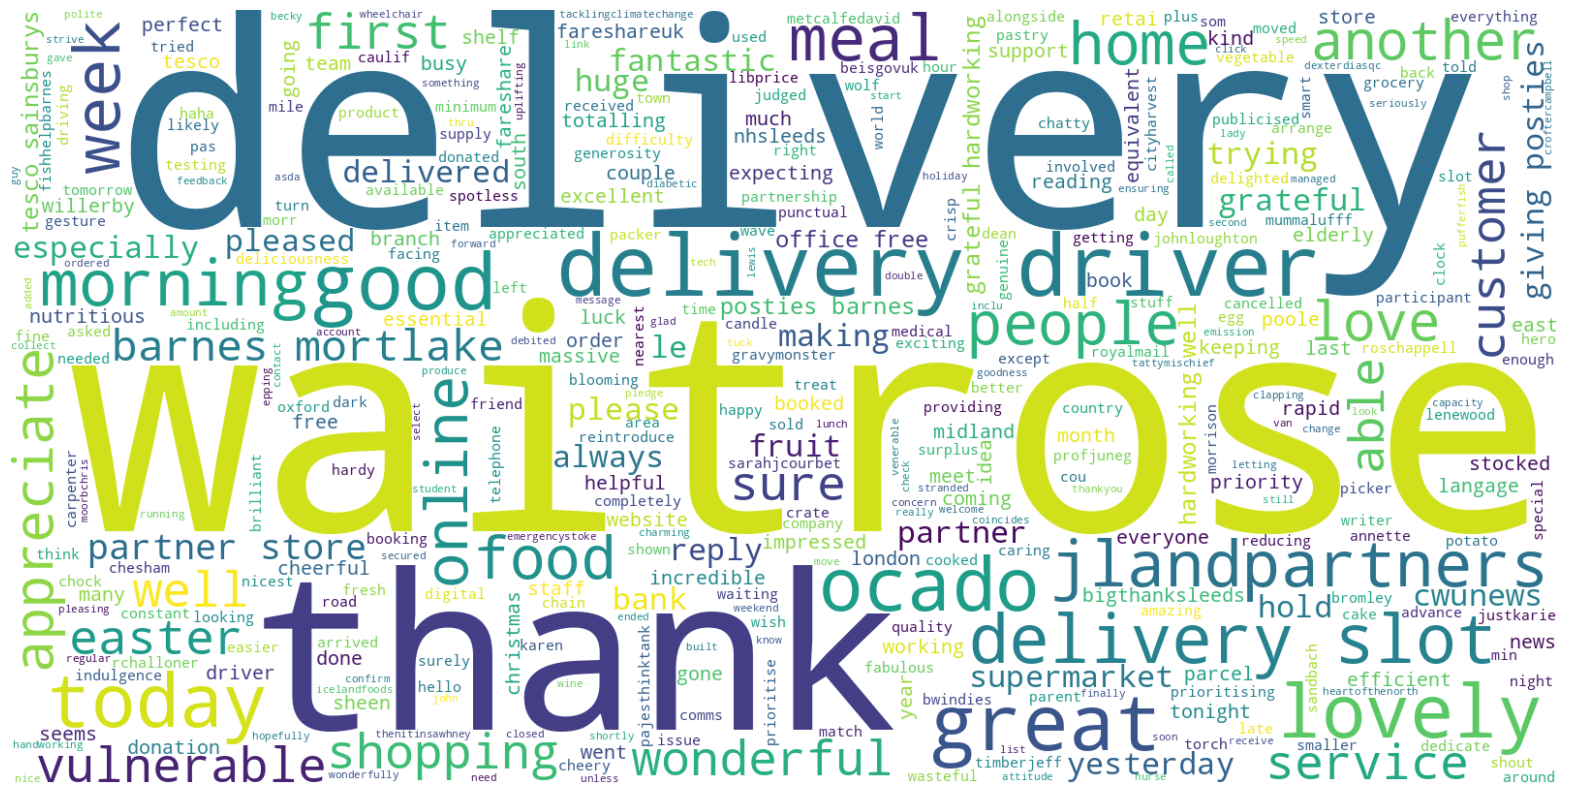

In [85]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))

wc = WordCloud(background_color='white', max_words=2000, width=1600, height=800)
positive_text = " ".join(sampled_df[sampled_df['predicted_sentiment'] == 'Positive']['text'])
wc.generate(positive_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


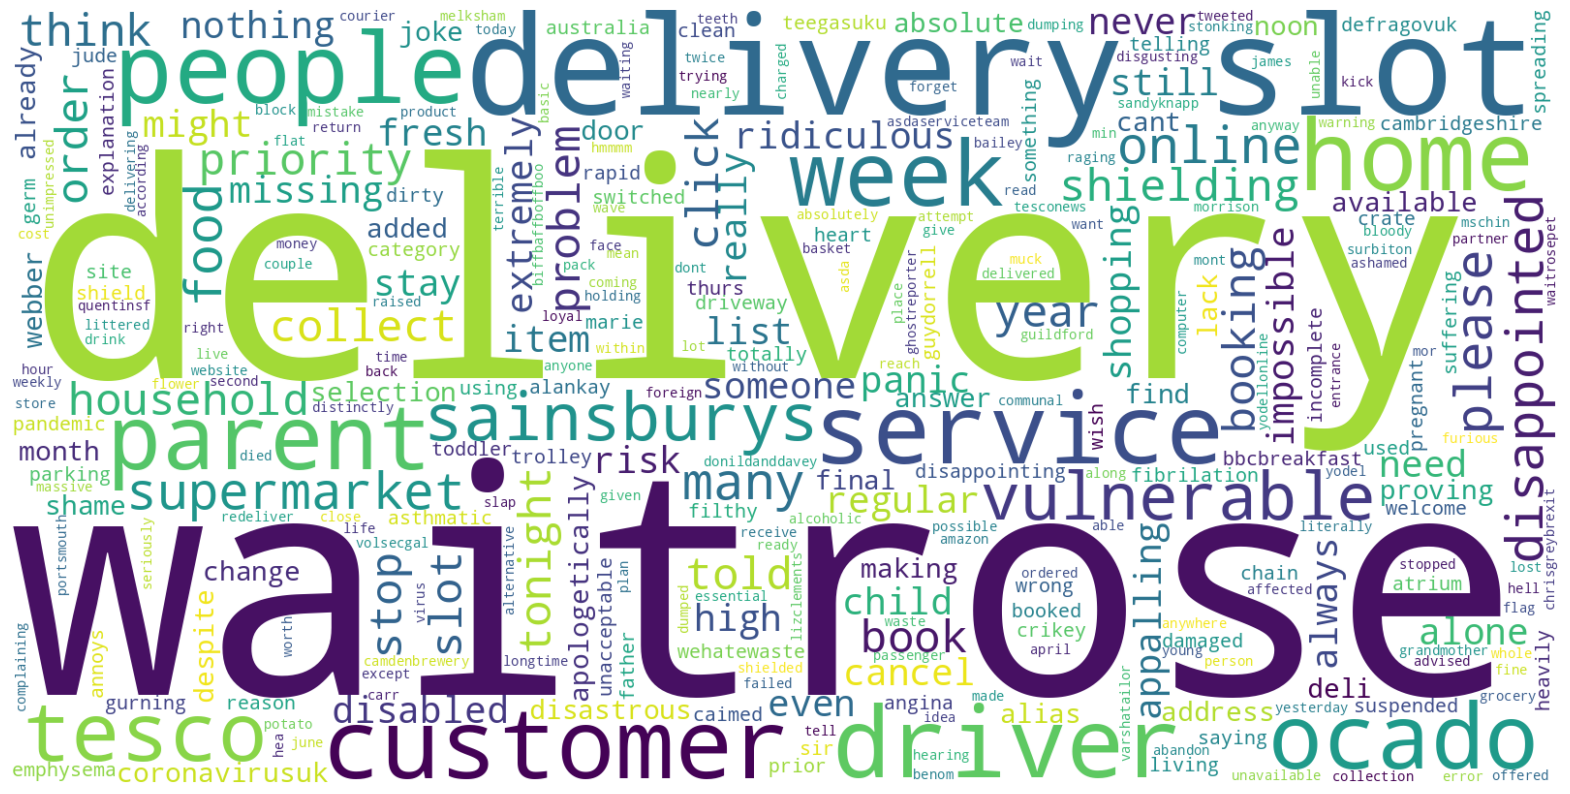

In [86]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))

wc = WordCloud(background_color='white', max_words=2000, width=1600, height=800)
positive_text = " ".join(sampled_df[sampled_df['predicted_sentiment'] == 'Negative']['text'])
wc.generate(positive_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()